# Exercise Synopsys

Before opening their APIs to the public, CitiBank's Chief Digital Officer is keen in exploring new revenue streams to monetize the larges amount of data they've been historically collecting. He knows other financial institutions are doing business with their data, but he still needs to define specific use cases in which his credit card transaction data can add real value. As Senior Data Scientists, the CDO assigns you with the key task of exploring in depth the data stored in your data centers and make a solid assessment of the real value provided by it. You will present this business case in Citibank's annual convention. 

# Pip Installs

In [73]:
#!pip install plotly
#!pip install squarify
#pip install geopandas
#pip install dash
#pip install plotly
#pip install adjustText
#pip install joypy

# Imports

In [74]:
from plotnine import *
from plotnine import ggplot, geom_map, aes, scale_fill_cmap, theme, labs
from plotnine.data import mpg
import pandas as pd
import numpy as np
import plotnine as p9
import squarify
%matplotlib inline
from pandas_profiling import ProfileReport
import plotly.express as px
import plotly.io as pio
import os
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

# Importing dataframe
    

In [75]:
df = pd.read_csv ("madrid_transactions.csv")

The dataset provided contains more than 10,000 credit card transactions performed by tourists in the city of Madrid during a month. CitiBank's DBA has already cleaned the file and uploaded it to the Campus Online, so you can solely focus on analyzing the different consumption patterns from tourists. The goal is to discover different insights from the data through data visualization (with GGPlot2) and then transform them into potential business outcomes. 

# Examples of Business Cases

- Is there a particular time in which tourists are buying?
- Which nationality has the highest average ticket and why?
- Is there any relationship between day of the week and consumption?
- Do high end fashion retailers need to focus more on attracting Australian visitors than on Chinese? Why? 

# Pandas EDA

### Making a backup of original dataframe

In [76]:
df_original = df.copy()

### Moving on with EDA

In [77]:
df.head()

,Unnamed: 0,amount,category,customer_country,daytime,hour,tx_date_proc,weekday
0,1,33.46,Fashion & Shoes,GB,Night,21,2012-03-01 21:51:54+00,thursday
1,2,59.97,Fashion & Shoes,GB,Afternoon,16,2012-03-02 16:12:52+00,friday
2,3,49.99,Fashion & Shoes,CN,Evening,17,2012-03-02 17:34:01+00,friday
3,4,5.95,Fashion & Shoes,GB,Evening,17,2012-03-01 17:43:29+00,thursday
4,5,16.65,Bars & restaurants,DK,Night,22,2012-03-01 22:47:52+00,thursday


In [78]:
df.tail()

,Unnamed: 0,amount,category,customer_country,daytime,hour,tx_date_proc,weekday
10788,10789,79.33,Bars & restaurants,IN,Night,21,2012-03-02 21:22:51+00,friday
10789,10790,77.70,Bars & restaurants,US,Night,22,2012-03-02 22:42:09+00,friday
10790,10791,48.25,Bars & restaurants,US,Midnight,23,2012-03-02 23:01:19+00,friday
10791,10792,368.90,Bars & restaurants,MY,Night,22,2012-03-02 22:35:46+00,friday
10792,10793,452.55,Bars & restaurants,CN,Afternoon,15,2012-03-01 15:27:26+00,thursday


In [79]:
df.describe()

,Unnamed: 0,amount,hour
count,10793.000000,10793.000000,10793.000000
mean,5397.000000,108.735644,15.032428
std,3115.815062,310.303331,4.809074
min,1.000000,0.040000,0.000000
25%,2699.000000,19.900000,12.000000
50%,5397.000000,39.990000,16.000000
75%,8095.000000,92.680000,18.000000
max,10793.000000,15000.000000,23.000000


Column Unnamed: 0 must be removed, it adds no value

In [80]:
del df['Unnamed: 0']

In [81]:
#columns are now clean
df.head(1)

,amount,category,customer_country,daytime,hour,tx_date_proc,weekday
0,33.46,Fashion & Shoes,GB,Night,21,2012-03-01 21:51:54+00,thursday


In [82]:
#making sure we got thurdays and fridays consistent with column tx_date_proc
df.iloc[5700:5800,:]

,amount,category,customer_country,daytime,hour,tx_date_proc,weekday
5700,24.95,Fashion & Shoes,GB,Mid morning,11,2012-03-02 11:33:21+00,friday
5701,54.90,Fashion & Shoes,FR,Mid morning,11,2012-03-02 11:47:53+00,friday
5702,219.60,Fashion & Shoes,BR,Mid morning,11,2012-03-02 11:50:50+00,friday
5703,52.90,Fashion & Shoes,IT,Mid morning,11,2012-03-02 11:51:50+00,friday
5704,29.90,Fashion & Shoes,TW,Afternoon,12,2012-03-02 12:00:04+00,friday
...,...,...,...,...,...,...,...
5795,25.98,Fashion & Shoes,FI,Afternoon,16,2012-03-02 16:06:40+00,friday
5796,97.75,Fashion & Shoes,FR,Afternoon,16,2012-03-02 16:08:00+00,friday
5797,18.85,Fashion & Shoes,SE,Afternoon,16,2012-03-02 16:09:14+00,friday
5798,67.00,Fashion & Shoes,US,Afternoon,16,2012-03-02 16:10:02+00,friday


### Feature engineering adjustment to have date and time separated

In [83]:
df.tx_date_proc = df.tx_date_proc.apply(pd.to_datetime)

In [84]:
df['Day'] = [d.date() for d in df['tx_date_proc']]
df['Time'] = [d.time() for d in df['tx_date_proc']]
df.tail(30)

,amount,category,customer_country,daytime,hour,tx_date_proc,weekday,Day,Time
10763,17.15,Food,US,Night,22,2012-03-01 22:12:02+00:00,thursday,2012-03-01,22:12:02
10764,192.65,Other goods and services,NL,Midnight,23,2012-03-01 23:23:01+00:00,thursday,2012-03-01,23:23:01
10765,200.00,Bars & restaurants,IT,Midnight,23,2012-03-01 23:48:00+00:00,thursday,2012-03-01,23:48:00
10766,1172.22,Accommodation,US,Morning,6,2012-03-02 06:50:17+00:00,friday,2012-03-02,06:50:17
10767,69.95,Accommodation,US,Morning,7,2012-03-02 07:23:41+00:00,friday,2012-03-02,07:23:41
10768,90.15,Accommodation,CN,Mid morning,9,2012-03-02 09:57:36+00:00,friday,2012-03-02,09:57:36
10769,455.00,Accommodation,RU,Mid morning,10,2012-03-02 10:29:35+00:00,friday,2012-03-02,10:29:35
10770,394.00,Fashion & Shoes,CL,Mid morning,11,2012-03-02 11:15:57+00:00,friday,2012-03-02,11:15:57
10771,244.00,Fashion & Shoes,IL,Mid morning,11,2012-03-02 11:34:59+00:00,friday,2012-03-02,11:34:59
10772,21.60,Health,SE,Mid morning,11,2012-03-02 11:38:59+00:00,friday,2012-03-02,11:38:59


Dates are consistent with the thursdays and fridays

### Feature engineering adjustment to have continent

In [85]:
country_df = pd.read_csv("country-and-continent-codes-list.csv")


In [86]:
df = df.join(country_df.set_index('Two_Letter_Country_Code'), on = 'customer_country')


Expanded information about the country and continent

In [87]:
del df['Three_Letter_Country_Code']

In [88]:
del df['Country_Number']

### Continue with Pandas EDA

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11324 entries, 0 to 10792
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   amount            11324 non-null  float64            
 1   category          11324 non-null  object             
 2   customer_country  11324 non-null  object             
 3   daytime           11324 non-null  object             
 4   hour              11324 non-null  int64              
 5   tx_date_proc      11324 non-null  datetime64[ns, UTC]
 6   weekday           11324 non-null  object             
 7   Day               11324 non-null  object             
 8   Time              11324 non-null  object             
 9   Continent_Name    11324 non-null  object             
 10  Continent_Code    9083 non-null   object             
 11  Country_Name      11324 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(9)
m

We converted the tx_date_proc column to a pure datetime64 format and added continents

# Geographical plot

In [90]:

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
print("Geometry Column Name : ", world.geometry.name)
print("Dataset Size : ", world.shape)
world.head()

Geometry Column Name :  geometry
Dataset Size :  (177, 6)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [91]:
country_code = pd.read_csv ("all.csv")

In [92]:
countries = world.merge(country_code, left_on="iso_a3", right_on="alpha-3")


In [93]:
df3 = df.groupby('customer_country')['amount'].sum().reset_index(name ='Total_Expenditure')
df4 = df.groupby('customer_country')['amount'].count().reset_index(name ='Total_Transactions')
df5 = df.groupby('customer_country')['amount'].mean().reset_index(name ='Avg_Ticket')
groups= df3.merge(df4,on='customer_country').merge(df5,on='customer_country')

In [94]:
sales_df= countries.merge(groups, left_on="alpha-2", right_on="customer_country")

# TARGET, ATRACT, RETAIN AND ENGAGE

## GOAL:

Increase credit card usage and spending among Citi credit cardholders visiting the city of Madrid by:

- Creating marketing campaings that will leverage data from their past consumer behavior
- Targeting our customers more precisely through smarter segmentation
- Developing a better value proposition to enhance the customer experience

We are going to identify the customers with a high propensity to respond to our marketing campaigns. To do so, we will segment our customers based on past spendings, specifically, the KPIs we will be looking at:
- Total expenditure
- Credit card transaction volume
- Average ticket value

Additionally, we will analyze expenditure by product category, nationality and daytime spending patterns.

## DEFINING TARGET AUDIENCE:



### Lets start analyzing our Customer's expenditure behavior

#### Total Expenditure

C:\Users\dianaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\plotnine\guides\guides.py:187: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


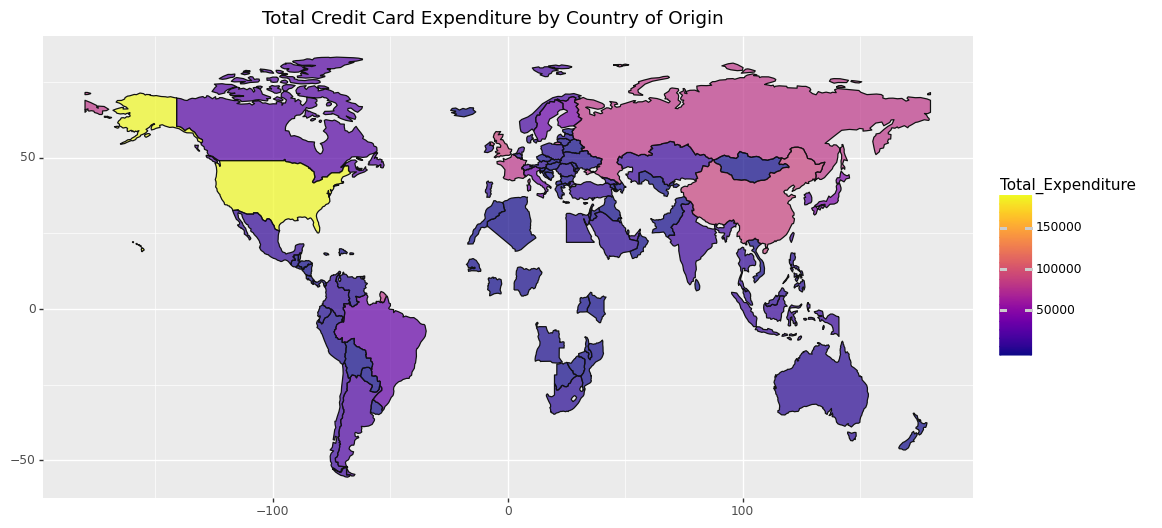

<ggplot: (175195605833)>

In [214]:
chart = ggplot(data=sales_df, mapping=aes(fill="Total_Expenditure"))
map_proj = geom_map(alpha = 0.7)
labels = labs(title="Total Credit Card Expenditure by Country of Origin")
theme_details = theme(figure_size=(12,6))
fill_colormap = scale_fill_cmap(cmap_name="plasma")
color_colormap = scale_color_cmap(cmap_name="plasma")
world_map_card = chart + map_proj + labels + theme_details + fill_colormap + color_colormap
world_map_card

In [96]:
#Selecting Top XX nationalities
# number of top-n you want
n = 25

# group by & sort descending
df_sorted = (sales_df
                .groupby('customer_country').sum()
                .sort_values('Total_Expenditure', ascending=False)
                .reset_index()
            )
# rename rows other than top-n to 'Others'
df_sorted.loc[df_sorted.index >= n, 'customer_country'] = 'Others'

sorted_levels = df_sorted.sort_values('Total_Expenditure')['customer_country']

sorted_custom = ['Others'] + [l for l in sorted_levels if not l == 'Others']

# reorder dataframe based on these factor levels
df_sorted['customer_country'] = pd.Categorical(df_sorted['customer_country'], sorted_custom)
df_sorted = df_sorted.sort_values('customer_country')


C:\Users\dianaf\AppData\Local\Temp\ipykernel_14564\4249008773.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


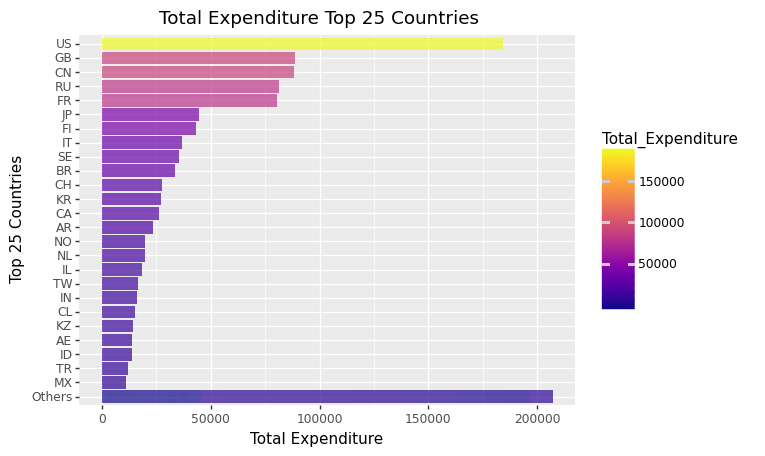

<ggplot: (175204572977)>

In [212]:
#Bar Chart for top 25 countries ordered by total expenses
ggplot(df_sorted, aes(x = 'customer_country', y = 'Total_Expenditure', fill='Total_Expenditure'))\
    + geom_bar(stat="identity",alpha = 0.7)\
        + scale_x_discrete()\
            + coord_flip()\
                +scale_fill_cmap(cmap_name="plasma")\
                    + ggtitle("Total Expenditure Top 25 Countries")\
                        +labs(y= "Total Expenditure ", x = "Top 25 Countries")                            

In [98]:
Left_join = pd.merge(left=df, right=df_sorted[['customer_country','Total_Expenditure']], on ='customer_country', how ='left')
Left_join['Total_Expenditure'].fillna('Other', inplace=True)
Left_join['Total_Expenditure'] = np.where(Left_join['Total_Expenditure'] != 'Other', Left_join['customer_country'], 'Other')
Left_join.rename(columns = {'Total_Expenditure':'Top_Expenditure'}, inplace = True)

In [99]:
df6 = pd.pivot_table(Left_join, index=['Top_Expenditure', 'category'], values='amount', aggfunc=['sum']).reset_index()

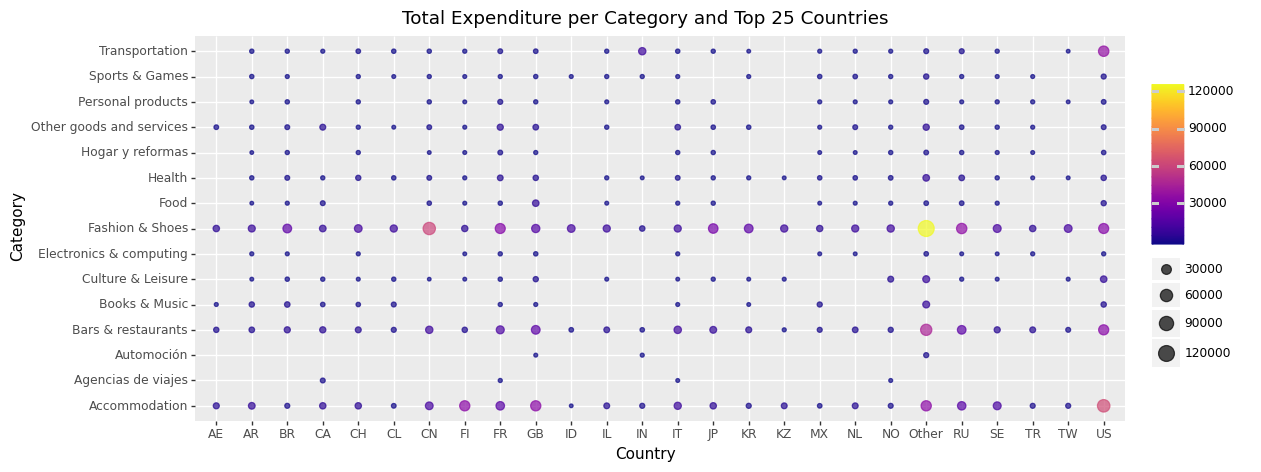

<ggplot: (175193904642)>

In [215]:
ggplot(df6, aes('Top_Expenditure', 'category')) +\
  geom_point(aes(size='sum', color = 'sum'),alpha = 0.7)+\
    theme(legend_title = element_blank())+\
      scale_color_cmap(cmap_name="plasma")+\
        ggtitle("Total Expenditure per Category and Top 25 Countries")+\
          labs(y= "Category", x = "Country")+\
            theme(figure_size=(12, 5)) 

In [101]:
Left_join

,amount,category,customer_country,daytime,hour,tx_date_proc,weekday,Day,Time,Continent_Name,Continent_Code,Country_Name,Top_Expenditure
0,33.46,Fashion & Shoes,GB,Night,21,2012-03-01 21:51:54+00:00,thursday,2012-03-01,21:51:54,Europe,EU,United Kingdom of Great Britain & Northern Ire...,GB
1,59.97,Fashion & Shoes,GB,Afternoon,16,2012-03-02 16:12:52+00:00,friday,2012-03-02,16:12:52,Europe,EU,United Kingdom of Great Britain & Northern Ire...,GB
2,49.99,Fashion & Shoes,CN,Evening,17,2012-03-02 17:34:01+00:00,friday,2012-03-02,17:34:01,Asia,AS,"China, People's Republic of",CN
3,5.95,Fashion & Shoes,GB,Evening,17,2012-03-01 17:43:29+00:00,thursday,2012-03-01,17:43:29,Europe,EU,United Kingdom of Great Britain & Northern Ire...,GB
4,16.65,Bars & restaurants,DK,Night,22,2012-03-01 22:47:52+00:00,thursday,2012-03-01,22:47:52,Europe,EU,"Denmark, Kingdom of",Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11319,79.33,Bars & restaurants,IN,Night,21,2012-03-02 21:22:51+00:00,friday,2012-03-02,21:22:51,Asia,AS,"India, Republic of",IN
11320,77.70,Bars & restaurants,US,Night,22,2012-03-02 22:42:09+00:00,friday,2012-03-02,22:42:09,North America,NaN,United States of America,US
11321,48.25,Bars & restaurants,US,Midnight,23,2012-03-02 23:01:19+00:00,friday,2012-03-02,23:01:19,North America,NaN,United States of America,US
11322,368.90,Bars & restaurants,MY,Night,22,2012-03-02 22:35:46+00:00,friday,2012-03-02,22:35:46,Asia,AS,Malaysia,Other


***Findouts:*** 

Total expediture reached $1.1M USD during the observed period. Around 110 nationalities visited the Madrid and made any sort of credit card spend, however out of those 110 nationalities, 20% (24 countries), account for 80% of total expenditure. Understanding and identifying characteristics of that 20% would be highly benefitial for our oubjective of increase credit card usage and spends. Top 5 countries are US, GB, CN, RU and FR. Database does not give us any indication of the amount of turists visiting the country so we can not identify wheter this high amount of credit card expenses come from more turist visiting the city or because these nationalities tend to use more electronic payments like credit cards. US is by far the nationality with the highest expenditure share, with 15% of total expenses. 

#### Credit Card transactions volume

C:\Users\dianaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\plotnine\guides\guides.py:187: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


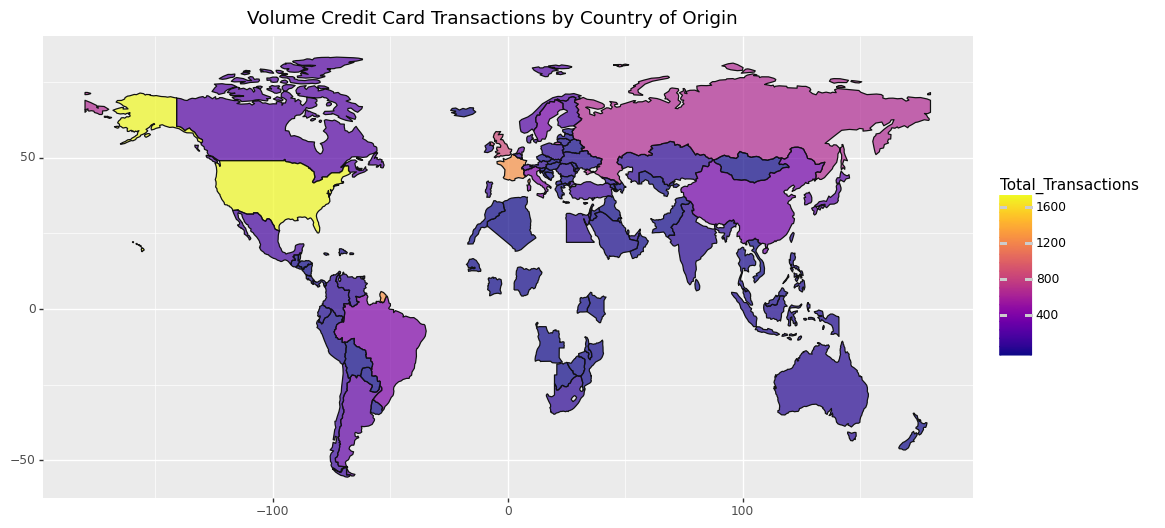

<ggplot: (175192637882)>

In [216]:
chart = ggplot(data=sales_df, mapping=aes(fill="Total_Transactions"))
map_proj = geom_map(alpha = 0.7)
labels = labs(title="Volume Credit Card Transactions by Country of Origin")
theme_details = theme(figure_size=(12,6))
fill_colormap = scale_fill_cmap(cmap_name="plasma")
color_colormap = scale_color_cmap(cmap_name="plasma")
world_map_card = chart + map_proj + labels + theme_details + fill_colormap + color_colormap
world_map_card

In [104]:
# number of top-n you want
n = 25

# group by & sort descending
df_sorted_vol = (sales_df
                .groupby('customer_country').sum()
                .sort_values('Total_Transactions', ascending=False)
                .reset_index()
            )
# rename rows other than top-n to 'Others'
df_sorted_vol.loc[df_sorted_vol.index >= n, 'customer_country'] = 'Others'

sorted_levels_vol = df_sorted_vol.sort_values('Total_Transactions')['customer_country']

sorted_custom_vol = ['Others'] + [l for l in sorted_levels_vol if not l == 'Others']

# reorder dataframe based on these factor levels
df_sorted_vol['customer_country'] = pd.Categorical(df_sorted_vol['customer_country'], sorted_custom_vol)
df_sorted_vol = df_sorted_vol.sort_values('customer_country')

C:\Users\dianaf\AppData\Local\Temp\ipykernel_14564\3228145557.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


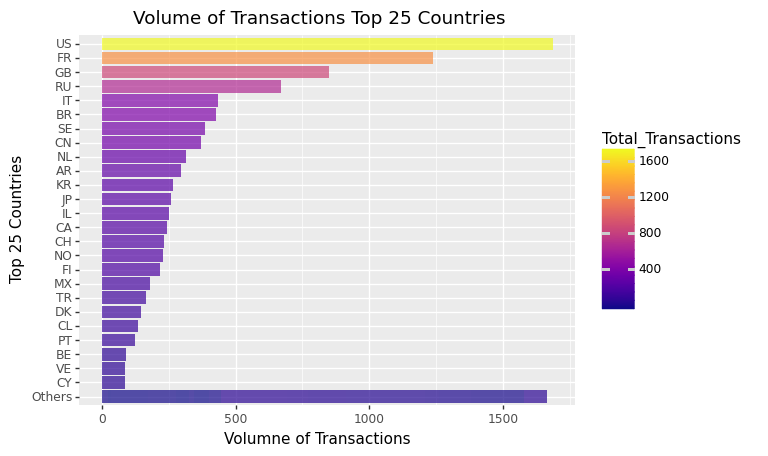

<ggplot: (175191205612)>

In [217]:
#Bar Chart for top 25 countries ordered by volume of transactions
ggplot(df_sorted_vol, aes(x = 'customer_country', y = 'Total_Transactions', fill='Total_Transactions'))\
    + geom_bar(stat="identity",alpha = 0.7)\
        + scale_x_discrete()\
            + coord_flip()\
                +scale_fill_cmap(cmap_name="plasma")\
                    + ggtitle("Volume of Transactions Top 25 Countries")\
                        +labs(y= "Volumne of Transactions ", x = "Top 25 Countries")\
                            + guides(color=guide_legend(title='Volume'))

In [106]:
Left_join = pd.merge(left=Left_join, right=df_sorted_vol[['customer_country','Total_Transactions']], on ='customer_country', how ='left')
Left_join['Total_Transactions'].fillna('Other', inplace=True)
Left_join['Total_Transactions'] = np.where(Left_join['Total_Transactions'] != 'Other', Left_join['customer_country'], 'Other')
Left_join.rename(columns = {'Total_Transactions':'Top_Transactions'}, inplace = True)

In [107]:
df7 = pd.pivot_table(Left_join, index=['Top_Transactions', 'category'], values='amount', aggfunc=['count']).reset_index()

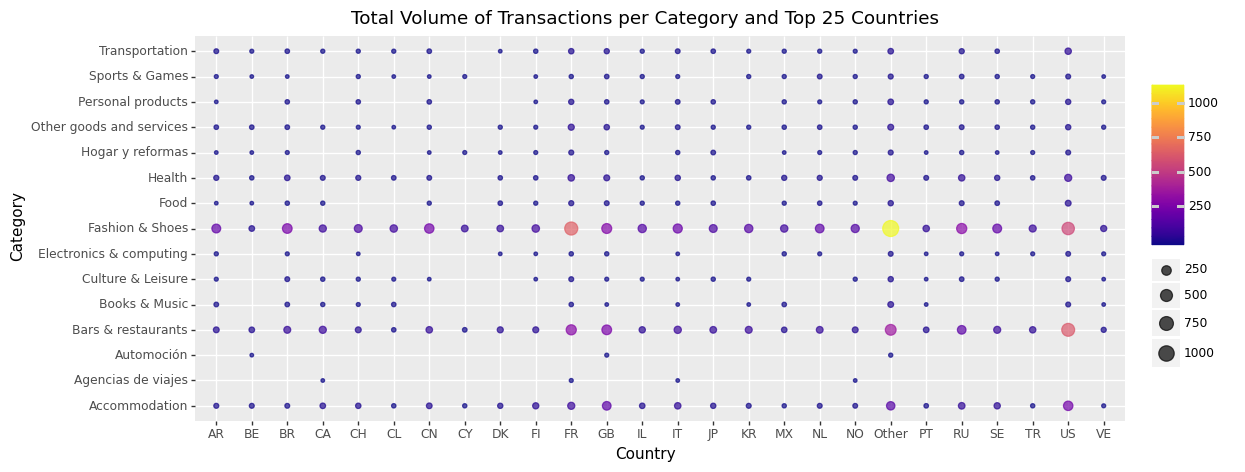

<ggplot: (175200978605)>

In [218]:
ggplot(df7, aes('Top_Transactions', 'category')) +\
  geom_point(aes(size='count', color = 'count'),alpha = 0.7)+\
    theme(legend_title = element_blank())+\
      scale_color_cmap(cmap_name="plasma")+\
        ggtitle("Total Volume of Transactions per Category and Top 25 Countries")+\
          labs(y= "Category", x = "Country")+\
            theme(figure_size=(12, 5)) 

***Findouts:*** 

During the observed period, a total of 3831 transactions where done in the city of Madrid by our credit card holders. Top 5 countries in terms of volumne of transactions are US, FR, GB, RU and IT. 4 out of 5 of these top transactors are also part of the top spenders, a point to take into consideration later on when designing marketing campaings.
By its own, credit card transaction volume, might not be a relevant indicator, however combined with other KPI, it can give us great insights of card-holders purchase behaviour. It will be interesting to understand if there is any volume spike on weekdays or weekends; that it is more pronounced with specific product types.

#### Average Ticket Value

C:\Users\dianaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\plotnine\guides\guides.py:187: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


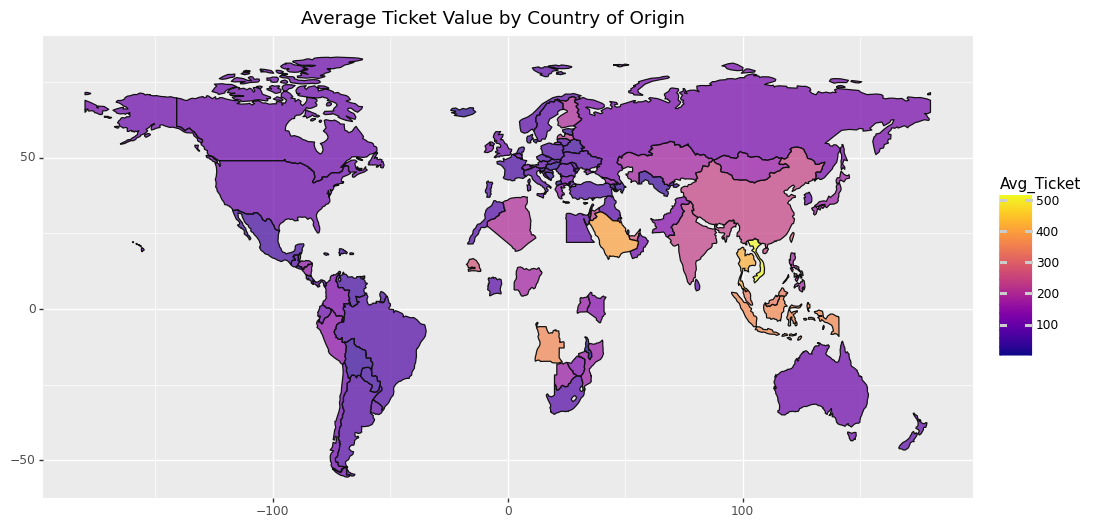

<ggplot: (175195664039)>

In [219]:
chart = ggplot(data=sales_df, mapping=aes(fill="Avg_Ticket"))
map_proj = geom_map(alpha = 0.7)
labels = labs(title="Average Ticket Value by Country of Origin")
theme_details = theme(figure_size=(12,6))
fill_colormap = scale_fill_cmap(cmap_name="plasma")
color_colormap = scale_color_cmap(cmap_name="plasma")
world_map_card = chart + map_proj + labels + theme_details + fill_colormap + color_colormap
world_map_card

In [110]:
#Selecting Top XX nationalities
# number of top-n you want
n = 25

# group by & sort descending
df_sorted_avg = (sales_df
                .groupby('customer_country').sum()
                .sort_values('Avg_Ticket', ascending=False)
                .reset_index()
            )
# rename rows other than top-n to 'Others'
df_sorted_avg.loc[df_sorted_avg.index >= n, 'customer_country'] = 'Others'

df_sorted_avg1 = df_sorted_avg.loc[df_sorted_avg['customer_country'] != 'Others']
# re-group by again
#df_sorted.groupby('customer_country').mean()

C:\Users\dianaf\AppData\Local\Temp\ipykernel_14564\453652490.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


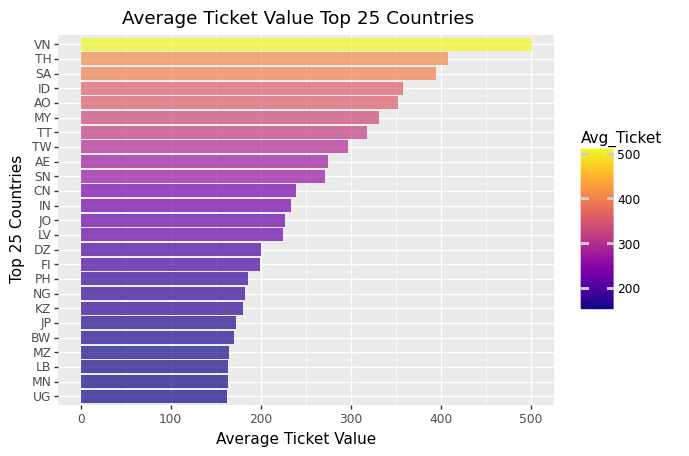

<ggplot: (175195100992)>

In [220]:
#Bar Chart for top 25 countries ordered by Average Ticket Value
ggplot(df_sorted_avg1, aes(x = 'reorder(customer_country, Avg_Ticket, fun=sum)', y = 'Avg_Ticket', fill='Avg_Ticket'))\
    + geom_bar(stat="identity",alpha = 0.7)\
        + scale_x_discrete()\
            + coord_flip()\
                +scale_fill_cmap(cmap_name="plasma")\
                    + ggtitle("Average Ticket Value Top 25 Countries")\
                        +labs(y= "Average Ticket Value ", x = "Top 25 Countries")\
                            + guides(color=guide_legend(title='Avg Ticket Value'))

In [112]:
Left_join = pd.merge(left=Left_join, right=df_sorted_avg[['customer_country','Avg_Ticket']], on ='customer_country', how ='left')
Left_join['Avg_Ticket'].fillna('Other', inplace=True)
Left_join['Avg_Ticket'] = np.where(Left_join['Avg_Ticket'] != 'Other', Left_join['customer_country'], 'Other')
Left_join.rename(columns = {'Avg_Ticket':'Top_Ticket'}, inplace = True)

In [114]:
df8 = pd.pivot_table(Left_join, index=['Top_Ticket', 'category'], values='amount', aggfunc=['mean']).reset_index()
df8

,Top_Ticket,category,mean
,,,amount
0,AE,Accommodation,270.770000
1,AE,Bars & restaurants,323.068571
2,AE,Books & Music,95.000000
3,AE,Fashion & Shoes,269.583913
4,AE,Other goods and services,285.000000
...,...,...,...
124,TW,Personal products,14.000000
125,TW,Transportation,10.950000
126,UG,Fashion & Shoes,162.450000


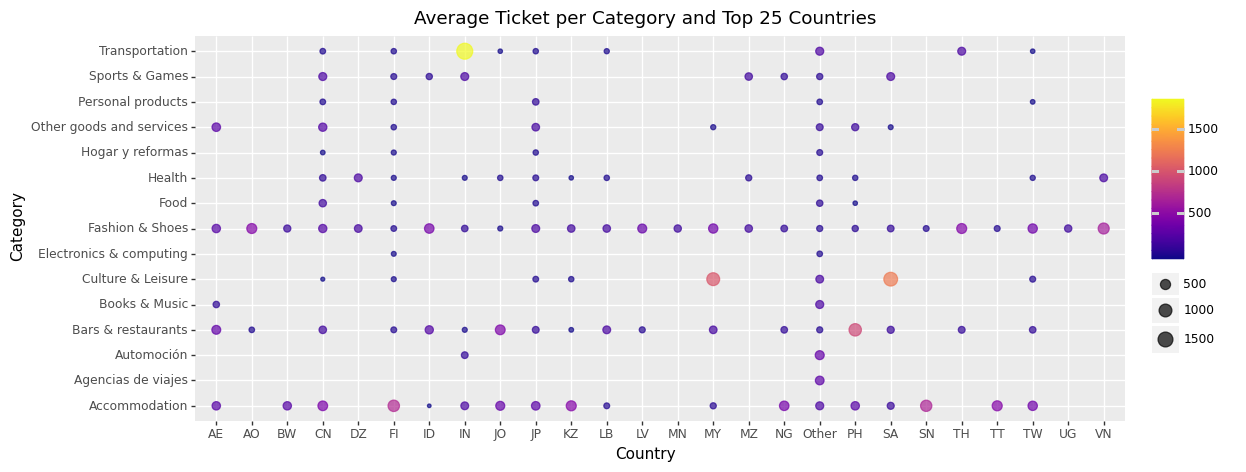

<ggplot: (175203983210)>

In [221]:
ggplot(df8, aes('Top_Ticket', 'category')) +\
  geom_point(aes(size='mean', color = 'mean'),alpha = 0.7)+\
    theme(legend_title = element_blank())+\
      scale_color_cmap(cmap_name="plasma")+\
        ggtitle("Average Ticket per Category and Top 25 Countries")+\
          labs(y= "Category", x = "Country")+\
            theme(figure_size=(12, 5)) 

***Findouts:*** 

The average ticket size in the observed period of time is close to $129. We find particularly interesting the countries with a high average ticket, most of them from the asian pacific. VN ( Vietnam) is the country with the highest average ticket, at $500, 4 times higher than the all up average ticket size, followed by TH (Thailand) at $408, SA (Saudi Arabia) at $395, ID (Indonesia) at $358 and finally AO (Angola) at $353. Summing up the transactions made by this group of countries, it is not more than 100 transactions. On the other side, countries with high volumne of transactions and total expenditure, have a quite low agerage ticket value. not reaching even $200 in the case of US, GB, FR and JP. China is quite a particular case, with high volume, and high average ticket.

### Daily Purchase Habits

C:\Users\dianaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\plotnine\scales\scale.py:102: PlotnineWarning: scale_y_continuous could not recognise parameter `label`


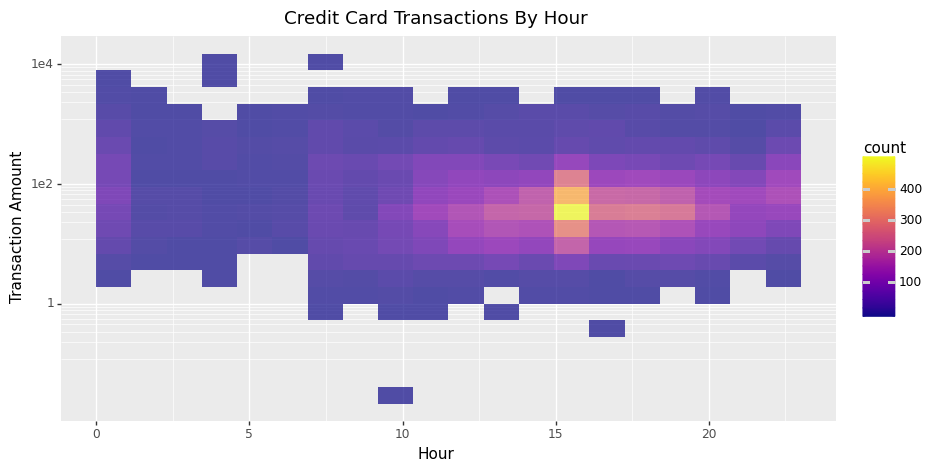

<ggplot: (175199862379)>

In [223]:
ggplot(Left_join)+geom_bin2d(aes('hour', 'amount'),bins=20,alpha = 0.7)\
     +scale_y_continuous(trans = "log10", label = "comma")\
          +scale_fill_cmap(cmap_name="plasma")\
               +ggtitle("Credit Card Transactions By Hour")\
                    +labs(y= "Transaction Amount", x = "Hour")\
                         +theme(figure_size=(10, 5))

In [320]:
df_pivot = pd.pivot_table(Left_join, index=['category', 'hour'], values='amount', aggfunc=['sum']).reset_index()
df9 = df_pivot.reset_index()
df9.columns = ['id','category', 'hour', 'sum_amount']

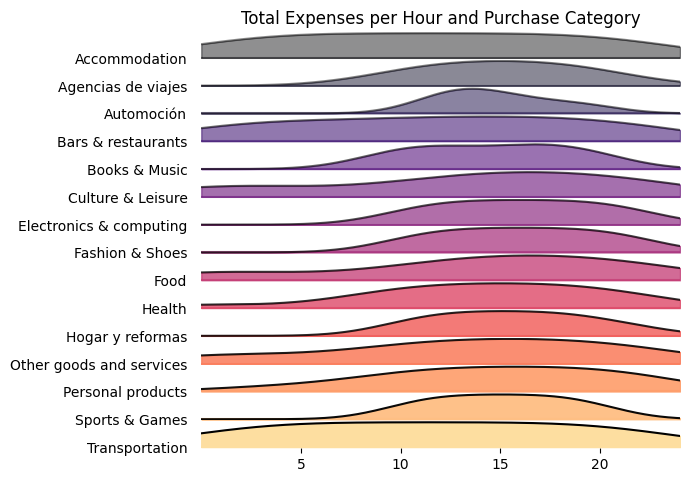

In [321]:
from joypy import joyplot
from matplotlib import cm

joyplot(df9, by="category", column = 'hour', 
        fade = True, figsize=(7,5), ylim='own', 
        colormap = plt.cm.magma, overlap=0.1,x_range=[0,24],
        title="Total Expenses per Hour and Purchase Category")
plt.show()

In [322]:
df_pivot11 = pd.pivot_table(Left_join, index=['tx_date_proc', 'category'], columns = 'weekday', values='hour').reset_index()
df11 = df_pivot11.reset_index()
df11.columns = ['id','tx_date_proc', 'category', 'Friday','Thrusday']

C:\Users\dianaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joypy\joyplot.py:238: UserWarning:

At least a column/group has no numeric values.

C:\Users\dianaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joypy\joyplot.py:286: UserWarning:

The data contains a group with a single distinct value (19.0) having infinite probability density. Consider using a different visualization.



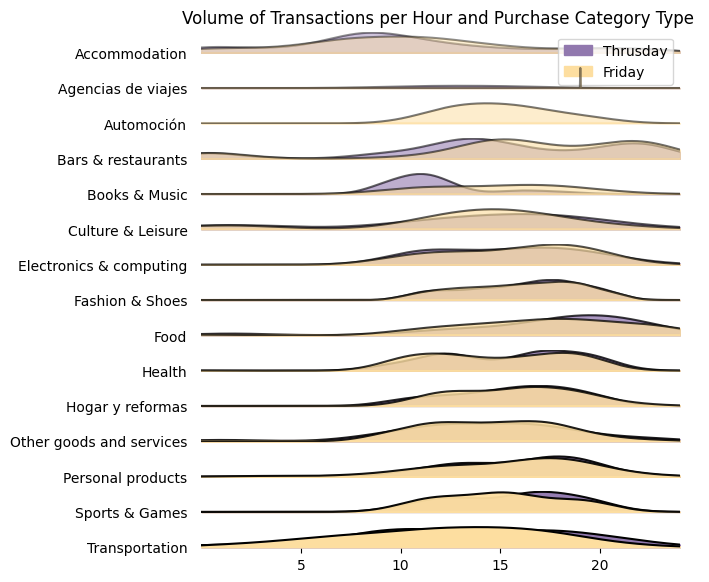

In [334]:
from joypy import joyplot
from matplotlib import cm

joyplot(df11, by="category", column = ['Thrusday','Friday'], 
        fade = True, figsize=(7,6), ylim='own', 
        overlap=0.2,x_range=[0,24],
        legend=True, color=['#9178ae', '#fddea0'], alpha=0.9,
        title="Volume of Transactions per Hour and Purchase Category Type ")
plt.show()

In [261]:
Left_join.head(1)

,amount,category,customer_country,daytime,hour,tx_date_proc,weekday,Day,Time,Continent_Name,Continent_Code,Country_Name,Top_Expenditure,Top_Transactions,Top_Ticket
0,33.46,Fashion & Shoes,GB,Night,21,2012-03-01 21:51:54+00:00,thursday,2012-03-01,21:51:54,Europe,EU,United Kingdom of Great Britain & Northern Ire...,GB,GB,Other


In [274]:
df_pivot1 = pd.pivot_table(Left_join, index=['category', 'daytime'], values='amount', aggfunc=['sum']).reset_index()
df10 = df_pivot1.reset_index()
df10.columns = ['id','category', 'daytime', 'sum_amount']

In [284]:
import plotly.express as px
import pandas as pd

fig= px.bar_polar(df10, r="sum_amount", theta = "daytime",
                 color = "category", template = "ggplot2",
                 color_discrete_sequence = px.colors.sequential.Plasma_r)
fig.update_layout(
    title='Total Credit Card Expenditure per Purchase Category Type and Daytime',
    font_size=12,
    legend_font_size=12,
    width=800, 
    height=500
)
fig.show()

### Findouts:

There is a concentration of activity around 15 in the afternon where the amount of transactions spikes significantly, with an average ticket value of close to $90 USD. 


### Targeting our Market

#### Transaction Volume v.s. Total Expenditure

In [118]:
conditions = [
    (sales_df['Total_Expenditure'] >= 9400) & (sales_df['Total_Transactions'] >= 6.5),
    (sales_df['Total_Expenditure'] < 9400) & (sales_df['Total_Transactions'] >= 6.5),
    (sales_df['Total_Transactions'] < 6.5)
    ]

# create a list of the values we want to assign for each condition
values = ['tier_3', 'tier_2', 'tier_1']

In [119]:
sales_df['Tier'] = np.select(conditions, values)

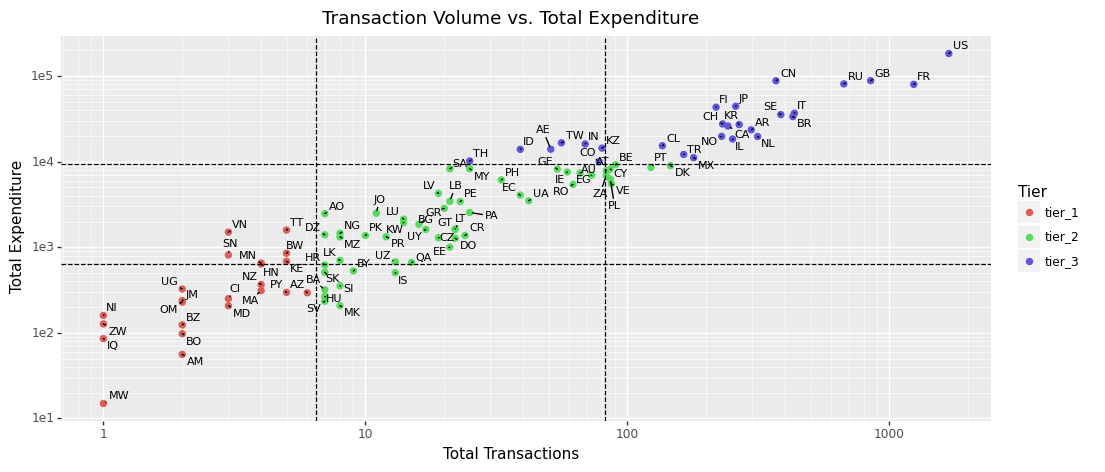

<ggplot: (175184803321)>

In [120]:
from adjustText import adjust_text
ggplot(sales_df , aes(x='Total_Transactions', y='Total_Expenditure'))+\
    geom_point(aes(color='Tier'), size = 2)+\
      scale_x_continuous(trans='log10')+\
        scale_y_continuous(trans='log10')+\
          ggtitle("Transaction Volume vs. Total Expenditure")+\
            geom_text(aes(label="customer_country"), colour = "black", size = 8, nudge_y=0.2, show_legend=False, adjust_text={'expand_points': (1.5, 1.5), 'arrowprops': {'arrowstyle': '-'}})+\
              geom_hline(yintercept=9400, linetype="dashed", color = "black")+\
                geom_hline(yintercept=630, linetype="dashed", color = "black")+\
                  geom_vline(xintercept=82.25, linetype="dashed", color = "black")+\
                    geom_vline(xintercept=6.5, linetype="dashed", color = "black")+\
                      labs(y= "Total Expenditure", x = "Total Transactions")+\
                        theme(figure_size=(12, 5)) 

### Findouts:

The marketing campaing strategy should encourage the right behavior, based on the target audience. We have implemented a segmentation technique based not only the most active and valuable cardholders, but also on those cardholders whose transaction activities are not big enough, but that highly invest on their holidays. Based on this simple segmentation technique applied to the turist cardholder population visiting Madrid, we identify 3 different tiers:

- **Tier 1:** these cardholders have low transaction activity, (less than 6.5 transactions) and total expenses may range from very little to significant high expenses. 2 different strategies can be implemented for this cluster

    a. Remain in the low transaction tier, increase total expenditure: Attract more tourist coming from countries where we have obseve low transactiosn but high expense, like Vietnam and Thailand, by leveraging their interest on fashion and shoes purchase categorie. For instace, offering travel credit cards with perks such a complementary lounge access, air mile earnings, co-branded benefits with airlines and travel partners or accelerated rewards on travel, welcome bonus in miles or free stays in hotels during expo events related to fashion and design.

    b. Move to tier 2 by increasing the number of transactions: encourage repeat usage, preferable in high-volume purchases categories like bar and restaurants. A good marketing strategy to incentivate this segment are promotional rates, for instance " 0% rate if credit card is used 5 times or more for partner bar or restaurant"

- **Tier 2:** carholders belonging to this tier have a moderate to high transaction activity and their total expenditures ranges from low to moderate. When it comes to this cluster, 2 different strategies can be implemented:

    a. Remain in tier 2 and increase the amount of transactions: invest in loyalty programs granting bonus points or cash-backs to encourage more frequent purchases, in first place, and if posible high spend.

    b. Move to tier 3 by increasing the total expenditure amount: increasing the share of wallet, assuming visitors from these countries and landing in this tear split their spend across multiple credit cards. Marketing campaings that incentivize spend with additional offers may be suitable here.

- **Tier 3:** these cardholders have a high level of transactions and a high expense, however not necesarly their average ticket is high. This is the case of citizens from US, FR, GB and RU as identified earlier. The reccommended strategy here is to focus on expand the product categories, these nationalities are used to spend. For instace "use your card to pay for xxx and get twice the points" or "Get 10000 bonus for all travel purchases mande in the next 90 days"

## ENGAGE

- Incrase Target market by entering into the Mobile payment system to allow an increase in transaction specially from travellers of countries countries similar to Spain as this market is highly dependant on the local mobile pay system




